# Importe modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *

# Plotting modules 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns

# Read amip-piForcing : radiative budget, tas

In [2]:
#------------- open files and read variables ----------------------
path = "/scratch/globc/peatier/CNRM-CM6-1/CFMIP/amip"
variables=['rlut', 'rsut', 'rsdt', 'tas']
filename_ctl_rlut = "/"+variables[0]+"_Amon_CNRM-CM6-1_amip-piForcing_r1i1p1f2_gr_187001-201412.nc"
filename_ctl_rsut = "/"+variables[1]+"_Amon_CNRM-CM6-1_amip-piForcing_r1i1p1f2_gr_187001-201412.nc"
filename_ctl_rsdt = "/"+variables[2]+"_Amon_CNRM-CM6-1_amip-piForcing_r1i1p1f2_gr_187001-201412.nc"
filename_ctl_tas = "/"+variables[3]+"_Amon_CNRM-CM6-1_amip-piForcing_r1i1p1f2_gr_187001-201412.nc"

ctl_rlut = xr.open_dataset(path+filename_ctl_rlut)    
ctl_rsut = xr.open_dataset(path+filename_ctl_rsut)  
ctl_rsdt = xr.open_dataset(path+filename_ctl_rsdt)  
ctl_tas = xr.open_dataset(path+filename_ctl_tas)  

#------------- rlut ----------------------
df_ctl_rlut=ctl_rlut['rlut'].to_dataframe()
df_ctl_rlut_year=df_ctl_rlut.reset_index(level=['time'])
df_ctl_rlut_year['year'] = pd.DatetimeIndex(df_ctl_rlut_year['time']).year
df_ctl_rlut_clim=df_ctl_rlut_year.groupby(['year']).mean()
#df_ctl_rlut_clim

#------------- rsut ----------------------
df_ctl_rsut=ctl_rsut['rsut'].to_dataframe()
df_ctl_rsut_year=df_ctl_rsut.reset_index(level=['time'])
df_ctl_rsut_year['year'] = pd.DatetimeIndex(df_ctl_rsut_year['time']).year
df_ctl_rsut_clim=df_ctl_rsut_year.groupby(['year']).mean()
#df_ctl_rsut_clim

#------------- rsdt ----------------------
df_ctl_rsdt=ctl_rsdt['rsdt'].to_dataframe()
df_ctl_rsdt_year=df_ctl_rsdt.reset_index(level=['time'])
df_ctl_rsdt_year['year'] = pd.DatetimeIndex(df_ctl_rsdt_year['time']).year
df_ctl_rsdt_clim=df_ctl_rsdt_year.groupby(['year']).mean()
#df_ctl_rsdt_clim

#------------- tas ----------------------
df_ctl_tas=ctl_tas['tas'].to_dataframe().drop('height',axis=1)
df_ctl_tas_year=df_ctl_tas.reset_index(level=['time'])
df_ctl_tas_year['year'] = pd.DatetimeIndex(df_ctl_tas_year['time']).year
df_ctl_tas_clim=df_ctl_tas_year.groupby(['year']).mean()
#df_ctl_tas_clim

#------------ Merge -------------------
ctl1=pd.merge(df_ctl_rlut_clim, df_ctl_rsut_clim,left_index=True,right_index=True)
ctl2=pd.merge(ctl1, df_ctl_rsdt_clim,left_index=True,right_index=True)
ctl3=pd.merge(ctl2, df_ctl_tas_clim,left_index=True,right_index=True)
ctl3

,rlut,rsut,rsdt,tas
year,,,,
1870,223.725830,103.911697,298.951080,277.275330
1871,223.738297,103.664124,298.951904,277.342285
1872,223.750626,103.670815,299.023926,277.384857
1873,223.844925,103.754616,298.950226,277.331146
1874,223.465515,103.960541,298.951080,277.144165
...,...,...,...,...
2010,225.047501,103.597878,298.951080,278.120728
2011,224.794678,103.102051,298.951904,278.024933
2012,225.122086,103.167130,299.023926,278.249817


In [3]:
# Compute radiative budget 
ctl3['F']=ctl3['rsdt']
ctl3['H']=ctl3['rsut']+ctl3['rlut']
ctl3['N']=ctl3['F']-ctl3['H']

# reshape
year_list=range(1906,2014,1)
ctl=ctl3.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
ctl

,rlut,rsut,rsdt,tas,F,H,N
0,223.725830,103.911697,298.951080,277.275330,298.951080,327.637512,-28.686432
1,223.738297,103.664124,298.951904,277.342285,298.951904,327.402405,-28.450500
2,223.750626,103.670815,299.023926,277.384857,299.023926,327.421448,-28.397522
3,223.844925,103.754616,298.950226,277.331146,298.950226,327.599548,-28.649323
4,223.465515,103.960541,298.951080,277.144165,298.951080,327.426056,-28.474976
5,223.790161,103.746635,298.951904,277.236755,298.951904,327.536804,-28.584900
6,223.610046,103.684578,299.023926,277.294800,299.023926,327.294617,-28.270691
7,223.836426,104.073570,298.950226,277.422974,298.950226,327.910004,-28.959778
8,224.384323,104.254753,298.951080,277.684998,298.951080,328.639069,-29.687988
9,224.018585,103.845146,298.951904,277.403687,298.951904,327.863739,-28.911835


# Read amip-p4xCO2 : radiative budget, tas

In [4]:
#------------- open files and read variables ----------------------
filename_rlut = "/"+variables[0]+"_Amon_CNRM-CM6-1_amip-4xCO2_r1i1p1f2_gr_197901-201412.nc"
filename_rsut = "/"+variables[1]+"_Amon_CNRM-CM6-1_amip-4xCO2_r1i1p1f2_gr_197901-201412.nc"
filename_rsdt = "/"+variables[2]+"_Amon_CNRM-CM6-1_amip-4xCO2_r1i1p1f2_gr_197901-201412.nc"
filename_tas = "/"+variables[3]+"_Amon_CNRM-CM6-1_amip-4xCO2_r1i1p1f2_gr_197901-201412.nc"

rlut = xr.open_dataset(path+filename_rlut)    
rsut = xr.open_dataset(path+filename_rsut)  
rsdt = xr.open_dataset(path+filename_rsdt)  
tas = xr.open_dataset(path+filename_tas)  

#------------- rlut ----------------------
df_rlut=rlut['rlut'].to_dataframe()
df_rlut_year=df_rlut.reset_index(level=['time'])
df_rlut_year['year'] = pd.DatetimeIndex(df_rlut_year['time']).year
df_rlut_clim=df_rlut_year.groupby(['year']).mean()
#df_p4K_rlut_clim

#------------- rsut ----------------------
df_rsut=rsut['rsut'].to_dataframe()
df_rsut_year=df_rsut.reset_index(level=['time'])
df_rsut_year['year'] = pd.DatetimeIndex(df_rsut_year['time']).year
df_rsut_clim=df_rsut_year.groupby(['year']).mean()
#df_p4K_rsut_clim

#------------- rsdt ----------------------
df_rsdt=rsdt['rsdt'].to_dataframe()
df_rsdt_year=df_rsdt.reset_index(level=['time'])
df_rsdt_year['year'] = pd.DatetimeIndex(df_rsdt_year['time']).year
df_rsdt_clim=df_rsdt_year.groupby(['year']).mean()
#df_p4K_rsdt_clim

#------------- tas ----------------------
df_tas=tas['tas'].to_dataframe().drop('height',axis=1)
df_tas_year=df_tas.reset_index(level=['time'])
df_tas_year['year'] = pd.DatetimeIndex(df_tas_year['time']).year
df_tas_clim=df_tas_year.groupby(['year']).mean()
#df_p4K_tas_clim

#------------ Merge -------------------
df1=pd.merge(df_rlut_clim, df_rsut_clim,left_index=True,right_index=True)
df2=pd.merge(df1, df_rsdt_clim,left_index=True,right_index=True)
df3=pd.merge(df2, df_tas_clim,left_index=True,right_index=True)
df3

,rlut,rsut,rsdt,tas
year,,,,
1979,218.133591,101.930840,299.138092,278.576202
1980,218.016190,102.276932,299.196655,278.555878
1981,218.138962,102.029541,299.127747,278.678223
1982,218.102112,102.246330,299.053345,278.502838
1983,217.914764,102.651436,299.051910,278.629791
1984,218.183029,101.771042,299.036072,278.725861
1985,217.695129,102.124008,298.933105,278.471924
1986,217.764694,102.159157,298.937439,278.602478
1987,218.235733,102.117310,298.956879,278.864166


In [5]:
# Compute radiative budget 
df3['F']=df3['rsdt']
df3['H']=df3['rsut']+df3['rlut']
df3['N']=df3['F']-df3['H']
df=df3.reset_index(level=['year']).drop(axis=1,columns='year')
df

,rlut,rsut,rsdt,tas,F,H,N
0,218.133591,101.930840,299.138092,278.576202,299.138092,320.064423,-20.926331
1,218.016190,102.276932,299.196655,278.555878,299.196655,320.293121,-21.096466
2,218.138962,102.029541,299.127747,278.678223,299.127747,320.168518,-21.040771
3,218.102112,102.246330,299.053345,278.502838,299.053345,320.348450,-21.295105
4,217.914764,102.651436,299.051910,278.629791,299.051910,320.566193,-21.514282
5,218.183029,101.771042,299.036072,278.725861,299.036072,319.954071,-20.917999
6,217.695129,102.124008,298.933105,278.471924,298.933105,319.819153,-20.886047
7,217.764694,102.159157,298.937439,278.602478,298.937439,319.923859,-20.986420
8,218.235733,102.117310,298.956879,278.864166,298.956879,320.353027,-21.396149
9,218.024353,101.966347,299.106628,278.672028,299.106628,319.990692,-20.884064


# Compute : Delta(TOA), Delta(tas), Lambda

In [39]:
result = pd.DataFrame()

i=3
N=len(df)
Lbda=[]
DN=[]
Dtas=[]
while i<N:
    ctl_tmp=ctl.iloc[0:i,:]
    df_tmp=df.iloc[0:i,:]
    Delta_N=df_tmp['N'].mean()-ctl_tmp['N'].mean()
    Delta_tas=df_tmp['tas'].mean()-ctl_tmp['tas'].mean()
    Lambda=Delta_N/Delta_tas
    Lbda.append(Lambda)
    DN.append(Delta_N)
    Dtas.append(Delta_tas)
    i=i+1
 
result['Delta_N']=DN
result['Delta_tas']=Dtas
result['Lambda']=Lbda
result

,Delta_N,Delta_tas,Lambda
0,7.490295,1.269287,5.901183
1,7.456276,1.244873,5.989587
2,7.357159,1.292999,5.689994
3,7.408783,1.325684,5.588651
4,7.405334,1.304474,5.676875
5,7.476337,1.288879,5.800649
6,7.566950,1.276703,5.926947
7,7.613029,1.275848,5.967033
8,7.629959,1.305878,5.842782
9,7.661623,1.317474,5.815387


# Create plots

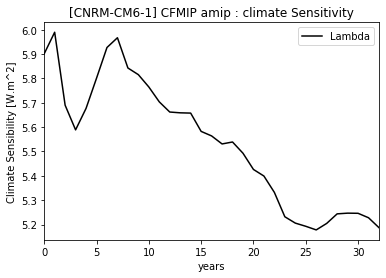

In [40]:
# Plot rsdt
#plt.subplot(221)
#ax0=plt.gca()
#ctl.plot(y='rsdt',kind='line',title='[CNRM-CM6-1] CFMIP amip : rsdt [W.m^2]',legend=True, color='Gray',figsize=(10,10),ax=ax0)
#df.plot(y='rsdt',kind='line',legend=True, color='Black',ax=ax0)
#plt.xlabel('years')
#plt.legend(['piForcing','4xCO2'])

# Plot rlut
#plt.subplot(222)
#ax1=plt.gca()
#ctl.plot(y='rlut',kind='line',title='[CNRM-CM6-1] CFMIP amip : rlut [W.m^2]',legend=True, color='Gray',figsize=(10,10),ax=ax1)
#df.plot(y='rlut',kind='line',legend=True, color='Black',ax=ax1)
#plt.xlabel('years')
#plt.legend(['piForcing','4xCO2'])

# Plot rsut
#plt.subplot(223)
#ax2=plt.gca()
#ctl.plot(y='rsut',kind='line',title='[CNRM-CM6-1] CFMIP amip : rsut [W.m^2]',legend=True, color='Gray',figsize=(10,10),ax=ax2)
#df.plot(y='rsut',kind='line',legend=True, color='Black',ax=ax2)
#plt.xlabel('years')
#ax2.legend(['piForcing','4xCO2'])

# Plot TOA
#plt.subplot(224)
#ax=plt.gca()
#ctl.plot(y='N',kind='line',title='[CNRM-CM6-1] CFMIP amip : N [W.m^2]',legend=True, color='Gray',figsize=(10,10),ax=ax)
#df.plot(y='N',kind='line',legend=True, color='Black',ax=ax)
#plt.xlabel('years')
#ax.legend(['piForcing','4xCO2'])

#Ajustement des subplots
#plt.tight_layout()
#plt.subplots_adjust(hspace = 0.30)

# Plot the different variables amip-4xCO2
#p4K.plot(y='rsut',kind='line',title='[CNRM-CM6-1] CFMIP amip-p4K : rsut [W.m^2]',legend=False)
#p4K.plot(y='rlut',kind='line',title='[CNRM-CM6-1] CFMIP amip-p4K : rlut [W.m^2]',legend=False)
#p4K.plot(y='TOA',kind='line',title='[CNRM-CM6-1] CFMIP amip-p4K : TOA',legend=False)
#df.plot(y='tas',kind='line',title='[CNRM-CM6-1] CFMIP amip-4xCO2 : tas [Kelvin]',legend=False)
#df.plot(y='N',kind='line',title='[CNRM-CM6-1] CFMIP amip-4xCO2 : N [W.m^2]',legend=False)
#p4K.plot(y='TOA',kind='line',title='[CNRM-CM6-1] CFMIP amip-p4K : TOA [W.m^2]',legend=False)

# Plot TOA VS tas 
#sns.lmplot(x='tas',y='N',data=df,fit_reg=True)
#sns.lmplot(x='tas',y='N',data=ctl,fit_reg=True)
#sns.lmplot(x='Delta_tas',y='Delta_N',data=result,fit_reg=True)
#ctl.plot(x='tas',y='TOA',kind='scatter',title='[CNRM-CM6-1] CFMIP amip-piForcing',legend=False)
#p4K.plot(x='tas',y='TOA',kind='scatter',title='[CNRM-CM6-1] CFMIP amip-p4K',legend=False)

#Plot result
result.plot(y='Lambda',kind='line',title='[CNRM-CM6-1] CFMIP amip : climate Sensitivity',color='black',legend=True)
plt.xlabel('years')
plt.ylabel('Climate Sensibility [W.m^2]')
#result.plot(y='Delta_N',kind='line',title='[CNRM-CM6-1] CFMIP amip',legend=True)
#result.plot(y='Delta_tas',kind='line',title='[CNRM-CM6-1] CFMIP amip',legend=True)

plt.show()